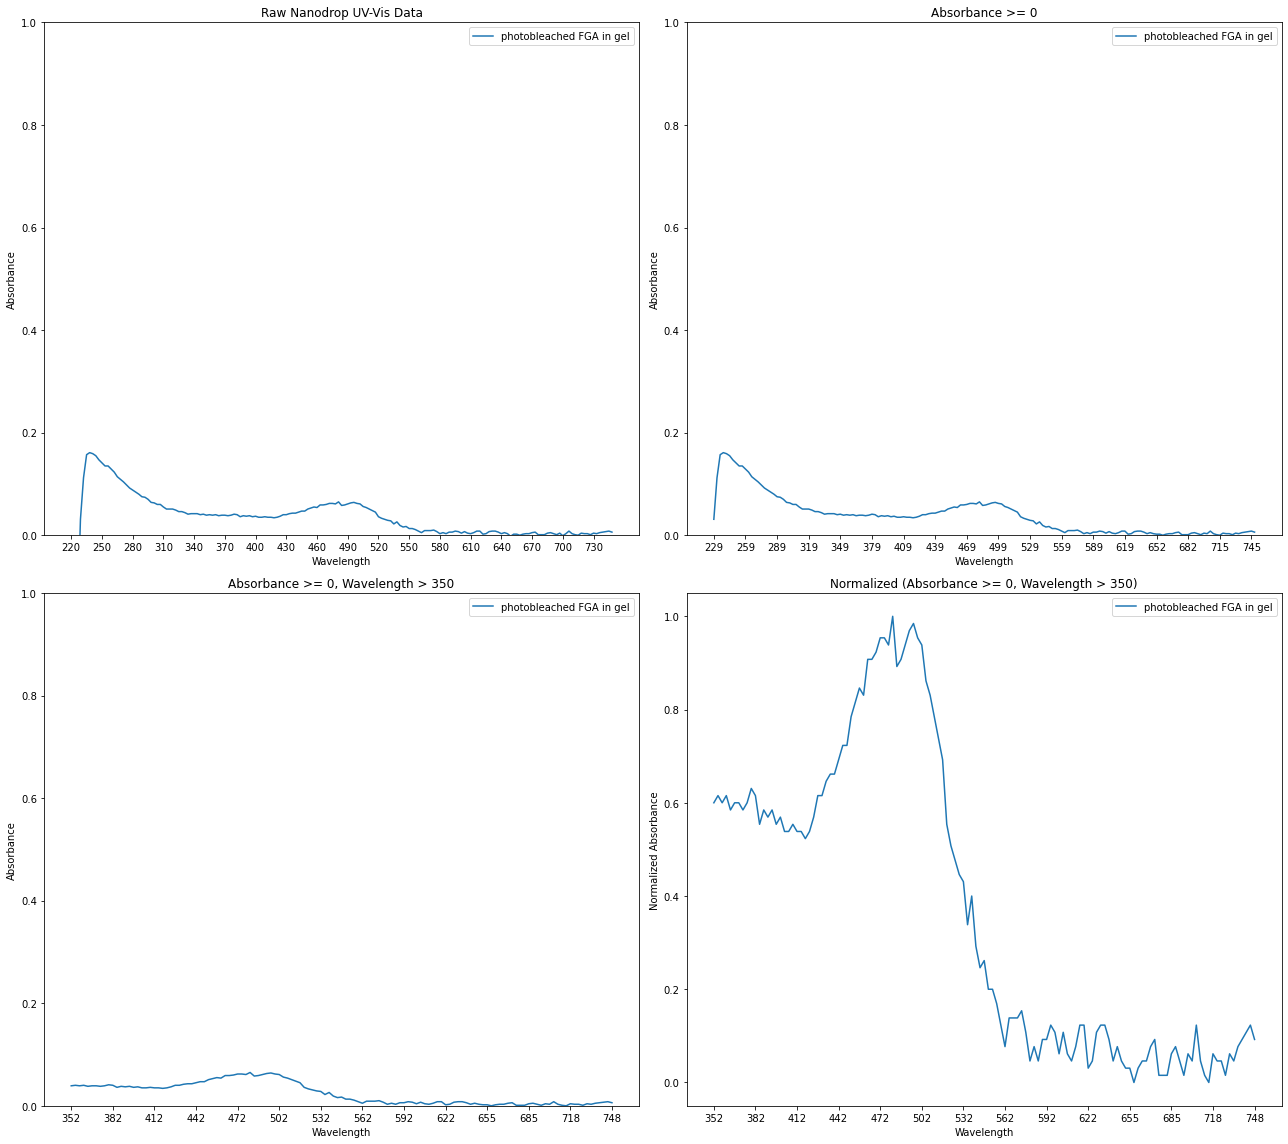

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize variables to hold data
samples_data = []
wavelengths = None

# Path to the .ndv file
file_path = 'C:\\Users\\ryanv\\OneDrive\\Desktop\\photobleachedFGAinGel.ndv'  # Replace with your actual file path

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Skip metadata lines (lines without tab-delimited data)
        if '\t' not in line:
            continue
        
        # Split the line into columns
        columns = line.strip().split('\t')
        
        # Read header line to extract wavelength values
        if wavelengths is None:
            # Find the index where wavelength data starts by identifying the first numeric value
            start_index = next((index for index, value in enumerate(columns) if value.replace('.', '', 1).isdigit()), None)
            if start_index is not None:
                wavelengths = columns[start_index:]
            continue
        
        # Read sample data
        sample_name = columns[0]  # Sample ID is the first column
        sample_values = columns[start_index:]  # Sample values start from start_index
        
        # Convert sample_values to floats for numerical operations
        sample_values = list(map(float, sample_values))
        
        # Append to samples_data
        samples_data.append((sample_name, sample_values))

# Convert samples_data to a DataFrame for easier manipulation
df_samples = pd.DataFrame([sample_values for _, sample_values in samples_data], columns=wavelengths)
df_samples['Sample Name'] = [sample_name for sample_name, _ in samples_data]
df_samples = df_samples.set_index('Sample Name')

# Plotting the data with subplots: various conditions and y-axis limit set to 1 for the first three plots
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# Plot all data
axes[0, 0].plot(wavelengths, sample_values, label=sample_name)
axes[0, 0].set_title('Raw Nanodrop UV-Vis Data')
axes[0, 0].set_xlabel('Wavelength')
axes[0, 0].set_ylabel('Absorbance')
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1)  # Set y-axis limit to 1
axes[0, 0].set_xticks(wavelengths[::10])  # Show every 10th wavelength label

# Filter data where absorbance is >= 0
filtered_wavelengths = [wavelength for wavelength, value in zip(wavelengths, sample_values) if value >= 0]
filtered_values = [value for value in sample_values if value >= 0]

# Plot filtered data
axes[0, 1].plot(filtered_wavelengths, filtered_values, label=sample_name)
axes[0, 1].set_title('Absorbance >= 0')
axes[0, 1].set_xlabel('Wavelength')
axes[0, 1].set_ylabel('Absorbance')
axes[0, 1].legend()
axes[0, 1].set_ylim(0, 1)  # Set y-axis limit to 1
axes[0, 1].set_xticks(filtered_wavelengths[::10])  # Show every 10th wavelength label for filtered data

# Filter data where absorbance is >= 0 and wavelength > 350
filtered_wavelengths_350 = [wavelength for wavelength, value in zip(wavelengths, sample_values) if value >= 0 and float(wavelength) > 350]
filtered_values_350 = [value for wavelength, value in zip(wavelengths, sample_values) if value >= 0 and float(wavelength) > 350]

# Plot filtered data with wavelength > 350
axes[1, 0].plot(filtered_wavelengths_350, filtered_values_350, label=sample_name)
axes[1, 0].set_title('Absorbance >= 0, Wavelength > 350')
axes[1, 0].set_xlabel('Wavelength')
axes[1, 0].set_ylabel('Absorbance')
axes[1, 0].legend()
axes[1, 0].set_ylim(0, 1)  # Set y-axis limit to 1
axes[1, 0].set_xticks(filtered_wavelengths_350[::10])  # Show every 10th wavelength label for filtered data

# Normalize the filtered data with wavelength > 350
if filtered_values_350:
    max_value_350 = max(filtered_values_350)
    normalized_values_350 = [value / max_value_350 for value in filtered_values_350]
else:
    normalized_values_350 = []

# Plot normalized data
axes[1, 1].plot(filtered_wavelengths_350, normalized_values_350, label=sample_name)
axes[1, 1].set_title('Normalized (Absorbance >= 0, Wavelength > 350)')
axes[1, 1].set_xlabel('Wavelength')
axes[1, 1].set_ylabel('Normalized Absorbance')
axes[1, 1].legend()
axes[1, 1].set_xticks(filtered_wavelengths_350[::10])  # Show every 10th wavelength label for filtered data

# Show the plots
plt.tight_layout()
plt.show()